In [1]:
import pandas as pd
from prophet import Prophet
from datetime import datetime as dt
import statsmodels.api as sm

Importing plotly failed. Interactive plots will not work.


In [157]:
df = pd.read_csv('./LD2011_2014.txt',sep = ';', low_memory=False)
df.tail()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
140251,2014-12-31 23:00:00,"2,53807106598985","22,0483641536273","1,73761946133797","150,406504065041","85,3658536585366","303,571428571429","11,3058224985868","282,828282828283","68,1818181818182",...,"276,945039257673",28200.0,"1616,03375527426","1363,63636363636","29,986962190352","5,85137507314219","697,102721685689","176,961602671119","651,026392961877","7621,62162162162"
140252,2014-12-31 23:15:00,"2,53807106598985","21,3371266002845","1,73761946133797","166,666666666667","81,7073170731707","324,404761904762","11,3058224985868","252,525252525253","64,6853146853147",...,"279,800142755175",28300.0,"1569,62025316456","1340,90909090909","29,986962190352","9,94733762434172","671,641791044776","168,614357262104","669,354838709677","6702,7027027027"
140253,2014-12-31 23:30:00,"2,53807106598985","20,6258890469417","1,73761946133797","162,60162601626","82,9268292682927","318,452380952381","10,1752402487281","242,424242424242","61,1888111888112",...,"284,796573875803",27800.0,"1556,96202531646","1318,18181818182","27,3794002607562","9,3622001170275","670,763827919227","153,589315525876","670,087976539589","6864,86486486487"
140254,2014-12-31 23:45:00,"1,26903553299492","21,3371266002845","1,73761946133797","166,666666666667","85,3658536585366","285,714285714286","10,1752402487281","225,589225589226","64,6853146853147",...,"246,252676659529",28000.0,"1443,03797468354","909,090909090909","26,0756192959583","4,09596255119953","664,618086040386","146,911519198664","646,627565982405","6540,54054054054"
140255,2015-01-01 00:00:00,"2,53807106598985","19,9146514935989","1,73761946133797","178,861788617886","84,1463414634146","279,761904761905","10,1752402487281","249,158249158249","62,9370629370629",...,"188,436830835118",27800.0,"1409,28270042194","954,545454545455","27,3794002607562","4,09596255119953","628,621597892889","131,886477462437","673,020527859238","7135,13513513513"


In [158]:
df = df.replace(r",", ".",regex = True) 
df = df.rename(columns = {"Unnamed: 0": "date"})

In [159]:
data = df.drop("date", axis = 1).astype("float")
data["time"] = pd.to_datetime(df.date)
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-01-01 00:15:00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-01-01 00:30:00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-01-01 00:45:00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-01-01 01:00:00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-01-01 01:15:00


In [160]:
data.ne(0).idxmax()

MT_001    35040
MT_002    35040
MT_003    35040
MT_004    35040
MT_005    35040
          ...  
MT_367    35040
MT_368    35040
MT_369    35040
MT_370    70176
time          0
Length: 371, dtype: int64

In [161]:
data.ne(0).idxmax().value_counts().head(5)

35040     160
0         159
106464     11
70176       3
109824      2
dtype: int64

In [162]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [163]:
data.MT_001.tail()

140251    2.538071
140252    2.538071
140253    2.538071
140254    1.269036
140255    2.538071
Name: MT_001, dtype: float64

In [164]:
data = data[['MT_001', 'time']]
data.head()

,MT_001,time
0,0.0,2011-01-01 00:15:00
1,0.0,2011-01-01 00:30:00
2,0.0,2011-01-01 00:45:00
3,0.0,2011-01-01 01:00:00
4,0.0,2011-01-01 01:15:00


In [165]:
data["year"] = data["time"].apply(lambda x: x.year)
data["month"] = data["time"].apply(lambda x: x.month)
data["day"] = data["time"].apply(lambda x: x.day)
data["weekday"] = data["time"].apply(lambda x: x.weekday())
data = data.join(pd.get_dummies(data.weekday))
data["hour"] = data["time"].apply(lambda x: x.hour)
data.head()

,MT_001,time,year,month,day,weekday,0,1,2,3,4,5,6,hour
0,0.0,2011-01-01 00:15:00,2011,1,1,5,0,0,0,0,0,1,0,0
1,0.0,2011-01-01 00:30:00,2011,1,1,5,0,0,0,0,0,1,0,0
2,0.0,2011-01-01 00:45:00,2011,1,1,5,0,0,0,0,0,1,0,0
3,0.0,2011-01-01 01:00:00,2011,1,1,5,0,0,0,0,0,1,0,1
4,0.0,2011-01-01 01:15:00,2011,1,1,5,0,0,0,0,0,1,0,1


### Lagged Value

In [166]:
for i in range(1, 21):
  data[f'lagged_{i}'] = data['MT_001'].shift(i).fillna(0)

data.tail()

,MT_001,time,year,month,day,weekday,0,1,2,3,...,lagged_11,lagged_12,lagged_13,lagged_14,lagged_15,lagged_16,lagged_17,lagged_18,lagged_19,lagged_20
140251,2.538071,2014-12-31 23:00:00,2014,12,31,2,0,0,1,0,...,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071
140252,2.538071,2014-12-31 23:15:00,2014,12,31,2,0,0,1,0,...,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071
140253,2.538071,2014-12-31 23:30:00,2014,12,31,2,0,0,1,0,...,2.538071,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036
140254,1.269036,2014-12-31 23:45:00,2014,12,31,2,0,0,1,0,...,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071
140255,2.538071,2015-01-01 00:00:00,2015,1,1,3,0,0,0,1,...,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071


In [167]:
data = data.loc[35040:]
data.head()

,MT_001,time,year,month,day,weekday,0,1,2,3,...,lagged_11,lagged_12,lagged_13,lagged_14,lagged_15,lagged_16,lagged_17,lagged_18,lagged_19,lagged_20
35040,3.807107,2012-01-01 00:15:00,2012,1,1,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35041,5.076142,2012-01-01 00:30:00,2012,1,1,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35042,3.807107,2012-01-01 00:45:00,2012,1,1,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35043,3.807107,2012-01-01 01:00:00,2012,1,1,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35044,5.076142,2012-01-01 01:15:00,2012,1,1,6,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train Test Split

In [168]:
train = data[:76000]
test = data[76000:]

In [169]:
data.shape

(105216, 34)

In [170]:
train.shape

(76000, 34)

In [171]:
test.shape

(29216, 34)

In [172]:
X_train = train.drop(['MT_001', 'time', 'weekday'], axis = 1)
X_train = sm.add_constant(X_train)
y_train = train.MT_001

X_test = test.drop(['MT_001', 'time', 'weekday'], axis = 1)
X_test = sm.add_constant(X_test)
y_test = test.MT_001

In [173]:
X_train.head()

,const,year,month,day,0,1,2,3,4,5,...,lagged_11,lagged_12,lagged_13,lagged_14,lagged_15,lagged_16,lagged_17,lagged_18,lagged_19,lagged_20
35040,1.0,2012,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35041,1.0,2012,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35042,1.0,2012,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35043,1.0,2012,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35044,1.0,2012,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Exploration

C:\Users\mylov\AppData\Local\Temp/ipykernel_25648/3943063165.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mylov\AppData\Local\Temp/ipykernel_25648/3943063165.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


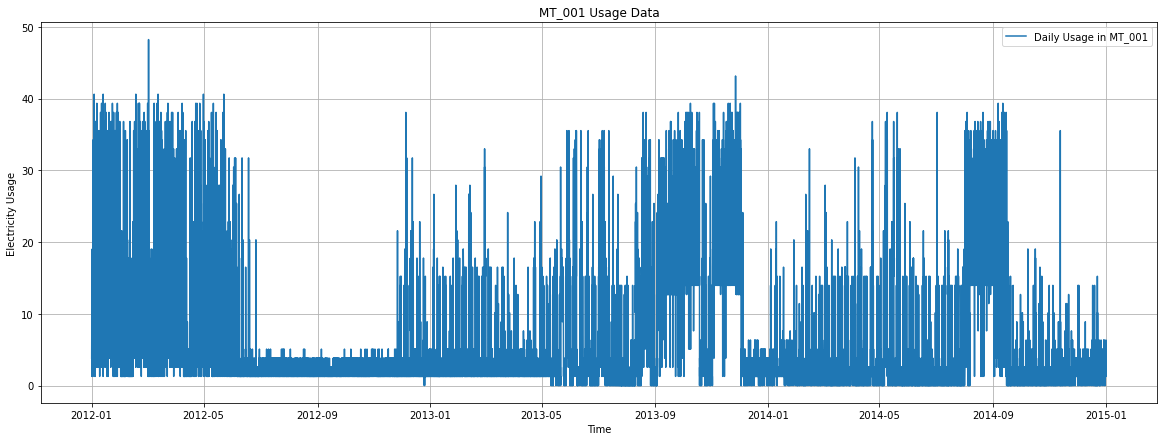

<Figure size 1440x720 with 0 Axes>

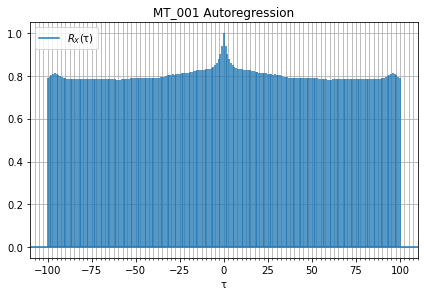

<Figure size 1440x720 with 0 Axes>

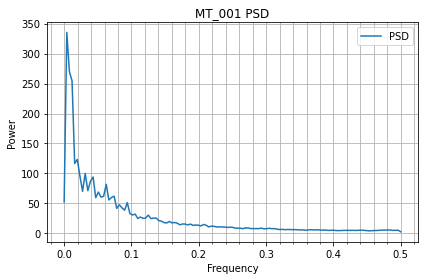

In [174]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acovf
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from scipy import signal
from scipy.fft import fft, ifft
from matplotlib.ticker import AutoMinorLocator
import math
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm


# Autocorrelation 
plt.figure(figsize=(20, 7))
plt.plot(data.time,data.MT_001)
plt.ylabel('Electricity Usage')
plt.xlabel('Time')
plt.title('MT_001 Usage Data')
plt.legend(['Daily Usage in MT_001'])
plt.grid(True)
t_date = data.time
x = data.MT_001.values

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.acorr(x,maxlags = 100)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['$R_X$(\u03C4)'],loc='upper left')
plt.xlabel('\u03C4')
ax.grid(True, which='both')
plt.tight_layout()
plt.title('MT_001 Autoregression')
fig.show()

#PSD
freqs, psd = signal.welch(x)
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.plot(freqs, psd)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('MT_001 PSD')
ax.grid(True, which='both')
plt.tight_layout()
fig.show()

### Regression Method

In [175]:
model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 MT_001   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:35:33   Log-Likelihood:            -1.8588e+05
No. Observations:               76000   AIC:                         3.718e+05
Df Residuals:                   75969   BIC:                         3.721e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2434     29.445      0.959      0.3

In [176]:
train.time

35040    2012-01-01 00:15:00
35041    2012-01-01 00:30:00
35042    2012-01-01 00:45:00
35043    2012-01-01 01:00:00
35044    2012-01-01 01:15:00
                 ...        
111035   2014-03-02 15:00:00
111036   2014-03-02 15:15:00
111037   2014-03-02 15:30:00
111038   2014-03-02 15:45:00
111039   2014-03-02 16:00:00
Name: time, Length: 76000, dtype: datetime64[ns]

In [177]:
X_test_rolling = X_test.copy().reset_index().drop('index', axis = 1)
rolling_predictions  = []
for i in range(29216):
    rolling_prediction = result.predict(X_test_rolling.iloc[i])
    rolling_predictions.append(rolling_prediction)
    for j in range(20):
        try:
            X_test_rolling.at[i+j, f'lagged_{j+1}'] = rolling_prediction
        except:
            'out_of_bound'

y_hat = pd.Series(rolling_predictions)

In [178]:
from statsmodels.tools.eval_measures import rmse

rmse(y_test, y_hat)

2.2315160850270623

In [179]:
y_hat

0        NaN    2.415171
dtype: float64
1        NaN    2.379074
dtype: float64
2        NaN    1.540116
dtype: float64
3        NaN    1.536038
dtype: float64
4        NaN    0.626552
dtype: float64
                      ...              
29211    NaN    1.725942
dtype: float64
29212    NaN    2.576203
dtype: float64
29213    NaN    2.556873
dtype: float64
29214    NaN    2.618375
dtype: float64
29215    NaN    1.687587
dtype: float64
Length: 29216, dtype: object

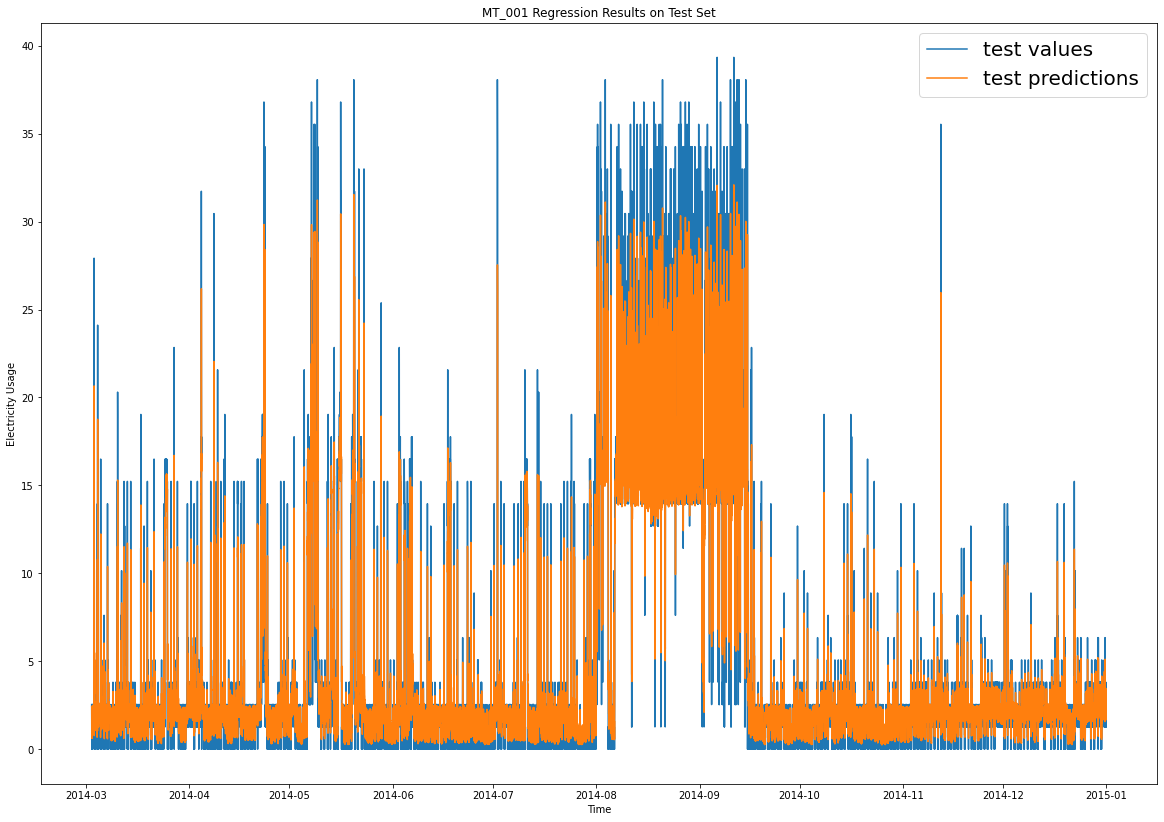

In [180]:
from matplotlib import pyplot as plt

y_train_preds = result.predict(X_train)
y_test_preds = result.predict(X_test)


plt.figure(figsize=(20, 14))
plt.plot(test.time, y_test, label='test values')
plt.plot(test.time, y_hat, label='test predictions')

plt.xlabel('Time')
plt.ylabel('Electricity Usage')
plt.title('MT_001 Regression Results on Test Set')
plt.legend(fontsize = 20)
plt.show()

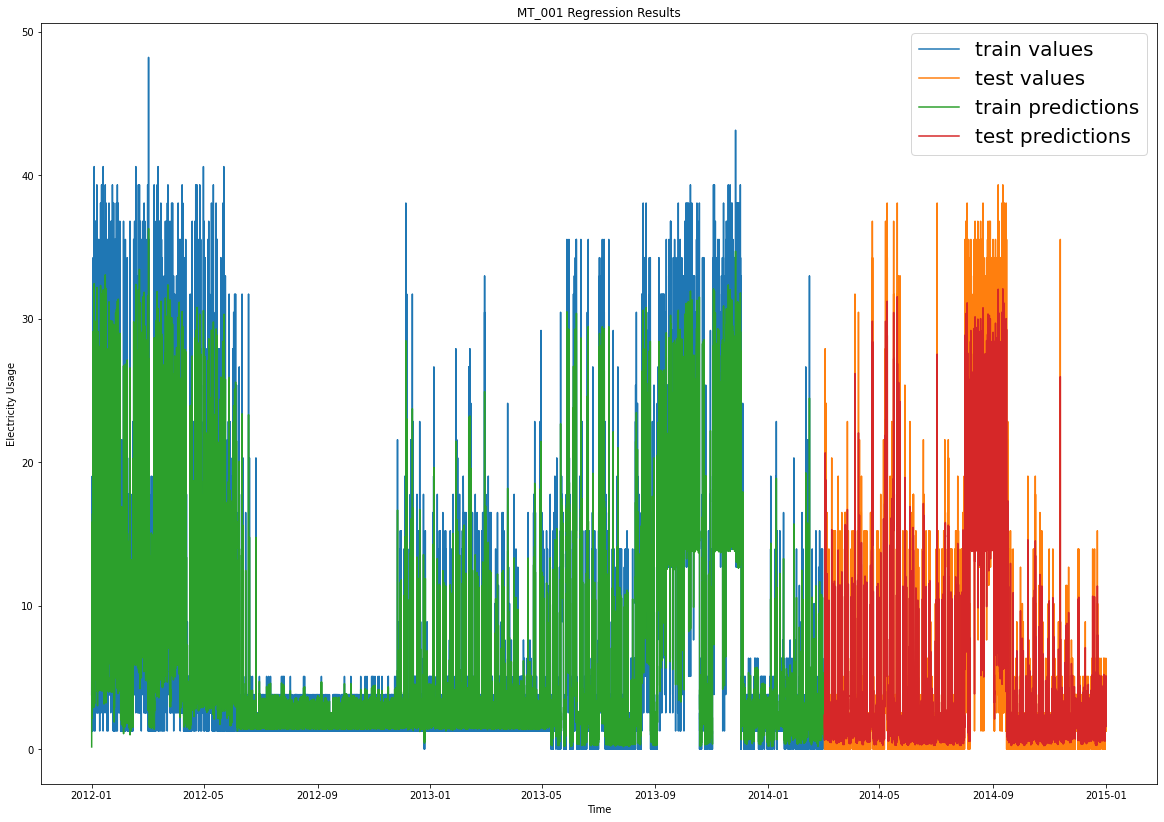

In [181]:
from matplotlib import pyplot as plt

y_train_preds = result.predict(X_train)
y_test_preds = result.predict(X_test)


plt.figure(figsize=(20, 14))
plt.plot(train.time, y_train, label='train values')
plt.plot(test.time, y_test, label='test values')
plt.plot(train.time, y_train_preds, label='train predictions')
plt.plot(test.time, y_hat, label='test predictions')

plt.xlabel('Time')
plt.ylabel('Electricity Usage')
plt.title('MT_001 Regression Results')
plt.legend(fontsize = 20)
plt.show()

### SARIMAX Model Using Auto-ARIMA

In [23]:
import pmdarima as pm
model = pm.auto_arima(train.MT_001, 
                      start_p=1,
                      start_q=1,
                      test='adf',
                      max_p=10,
                      max_q=10,
                      d=None, 
                      seasonal=True, 
                      seasonal_test='ocsb',
                      start_P=0, 
                      D=1, 
                      trace=True,
                      suppress_warnings=True, 
                      stepwise=True)


print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=376957.184, Time=8.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=499962.989, Time=0.77 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=378657.576, Time=1.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=442148.453, Time=6.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=542676.504, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=371102.357, Time=36.65 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=377416.960, Time=1.72 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=371151.216, Time=54.78 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=371097.277, Time=60.65 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=375250.708, Time=13.63 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=39.53 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=371090.942, Time=59.57 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=373305.391, Time=21.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=66.47 sec
 ARIMA(2,0,

In [24]:
import pickle
with open('seasonal.pkl', 'wb') as f:
    pickle.dump(model, f)

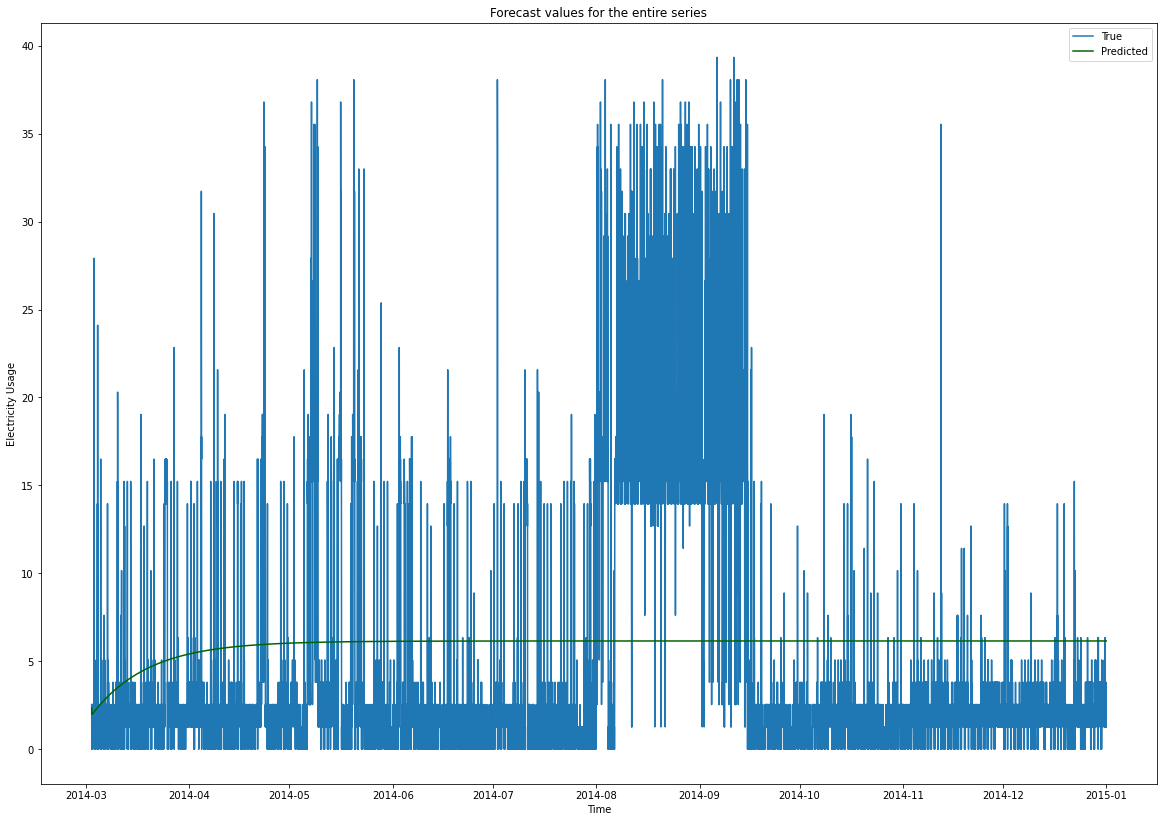

In [44]:
yhat = model.predict(n_periods=len(y_test), return_conf_int=False)
plt.figure(figsize=(20, 14))
plt.plot(test.time, y_test, label = 'True')
plt.plot(test.time, yhat, color='darkgreen', label = 'Predicted')
plt.title('Forecast values for the entire series')
plt.xlabel('Time')
plt.ylabel('Electricity Usage')
plt.legend()
plt.show()

In [43]:
rmse(y_test, yhat)

6.155736140168759

### Facebook Prophet with Exogenous Features

In [45]:
from prophet import Prophet

In [51]:
train['ds'] = train.time
train['y'] = train.MT_001

test['ds'] = test.time
test['y'] = test.MT_001

C:\Users\mylov\AppData\Local\Temp/ipykernel_25836/1303372891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = train.time
C:\Users\mylov\AppData\Local\Temp/ipykernel_25836/1303372891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = train.MT_001
C:\Users\mylov\AppData\Local\Temp/ipykernel_25836/1303372891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [79]:
train = train.rename(columns = {0: "Sun", 1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})
test = test.rename(columns = {0: "Sun", 1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})

In [80]:
m = Prophet()
m.add_regressor('month')
m.add_regressor('day')
m.add_regressor('Sun')
m.add_regressor('Mon')
m.add_regressor('Tues')
m.add_regressor('Wed')
m.add_regressor('Thurs')
m.add_regressor('Fri')
m.add_regressor('Sat')
m.fit(train)

13:16:21 - cmdstanpy - INFO - Chain [1] start processing
13:18:30 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
future = test[['ds', 'month', 'day', 'weekday', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']]
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Fri,Fri_lower,Fri_upper,Mon,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-03-02 16:15:00,7.387517,-2.330070,9.170790,7.387517,7.387517,0.0,0.0,0.0,0.0,...,-0.141984,-0.141984,-0.141984,-5.309345,-5.309345,-5.309345,0.0,0.0,0.0,2.955985
1,2014-03-02 16:30:00,7.387571,-2.933563,9.164715,7.387571,7.387571,0.0,0.0,0.0,0.0,...,-0.137224,-0.137224,-0.137224,-5.308585,-5.308585,-5.308585,0.0,0.0,0.0,2.960015
2,2014-03-02 16:45:00,7.387625,-2.619431,8.608139,7.387625,7.387625,0.0,0.0,0.0,0.0,...,-0.132517,-0.132517,-0.132517,-5.307824,-5.307824,-5.307824,0.0,0.0,0.0,2.944636
3,2014-03-02 17:00:00,7.387679,-3.063856,8.765638,7.387679,7.387679,0.0,0.0,0.0,0.0,...,-0.127864,-0.127864,-0.127864,-5.307060,-5.307060,-5.307060,0.0,0.0,0.0,2.912221
4,2014-03-02 17:15:00,7.387732,-2.590091,8.681553,7.387732,7.387732,0.0,0.0,0.0,0.0,...,-0.123264,-0.123264,-0.123264,-5.306295,-5.306295,-5.306295,0.0,0.0,0.0,2.866523


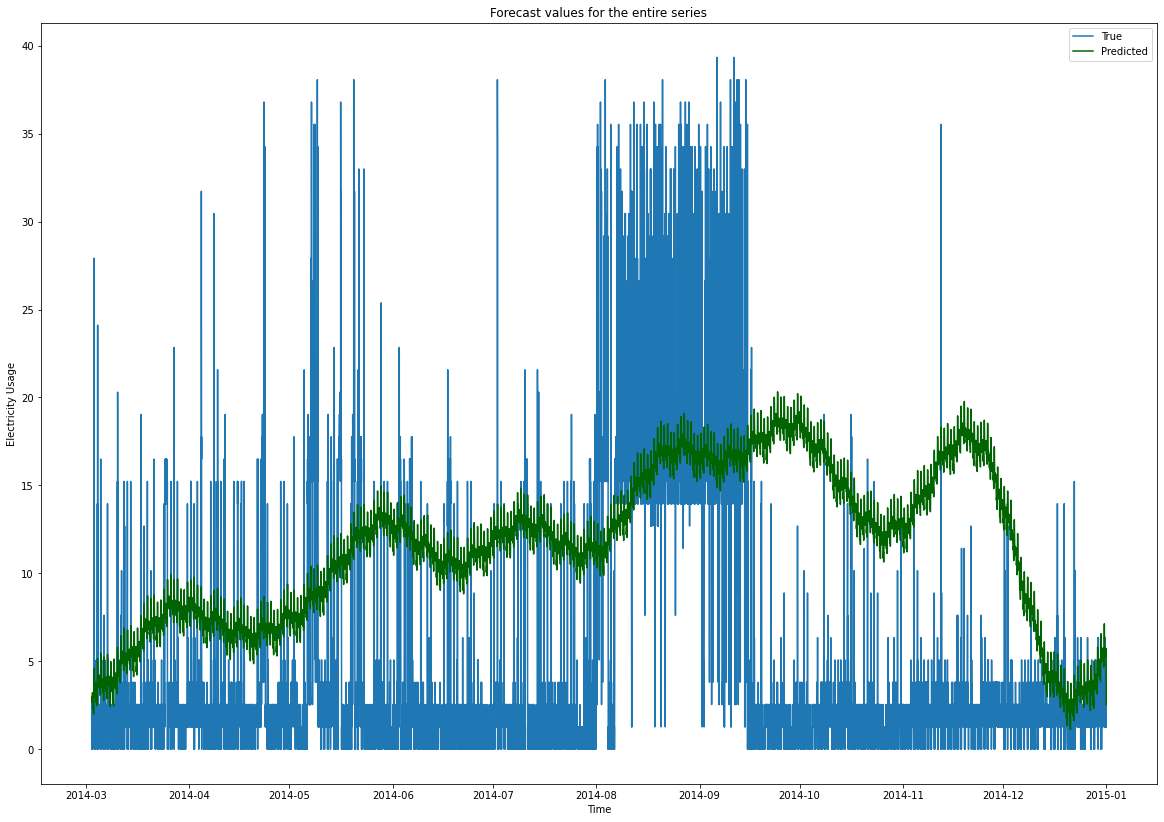

In [82]:
plt.figure(figsize=(20, 14))
plt.plot(test.time, y_test, label = 'True')
plt.plot(test.time, forecast.yhat, color='darkgreen', label = 'Predicted')
plt.title('Forecast values for the entire series')
plt.xlabel('Time')
plt.ylabel('Electricity Usage')
plt.legend()
plt.show()

In [83]:
rmse(y_test, forecast.yhat)

9.614760354858179

### Comparing the 3 methods using total usage data

In [146]:
data = df.drop("date", axis = 1).astype("float")
data["time"] = pd.to_datetime(df.date)
data['total_usage'] = data.sum(axis = 1)
data = data[['total_usage', 'time']]

data["year"] = data["time"].apply(lambda x: x.year)
data["month"] = data["time"].apply(lambda x: x.month)
data["day"] = data["time"].apply(lambda x: x.day)
data["weekday"] = data["time"].apply(lambda x: x.weekday())
data = data.join(pd.get_dummies(data.weekday))
data["hour"] = data["time"].apply(lambda x: x.hour)

C:\Users\mylov\AppData\Local\Temp/ipykernel_25648/134290546.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['total_usage'] = data.sum(axis = 1)


In [147]:
for i in range(1, 21):
  data[f'lagged_{i}'] = data['total_usage'].shift(i).fillna(0)

In [148]:
data = data.loc[35040:]

train = data[:76000]
test = data[76000:]

X_train = train.drop(['total_usage', 'time', 'weekday'], axis = 1)
X_train = sm.add_constant(X_train)
y_train = train.total_usage

X_test = test.drop(['total_usage', 'time', 'weekday'], axis = 1)
X_test = sm.add_constant(X_test)
y_test = test.total_usage

C:\Users\mylov\AppData\Local\Temp/ipykernel_25648/3501970376.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mylov\AppData\Local\Temp/ipykernel_25648/3501970376.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


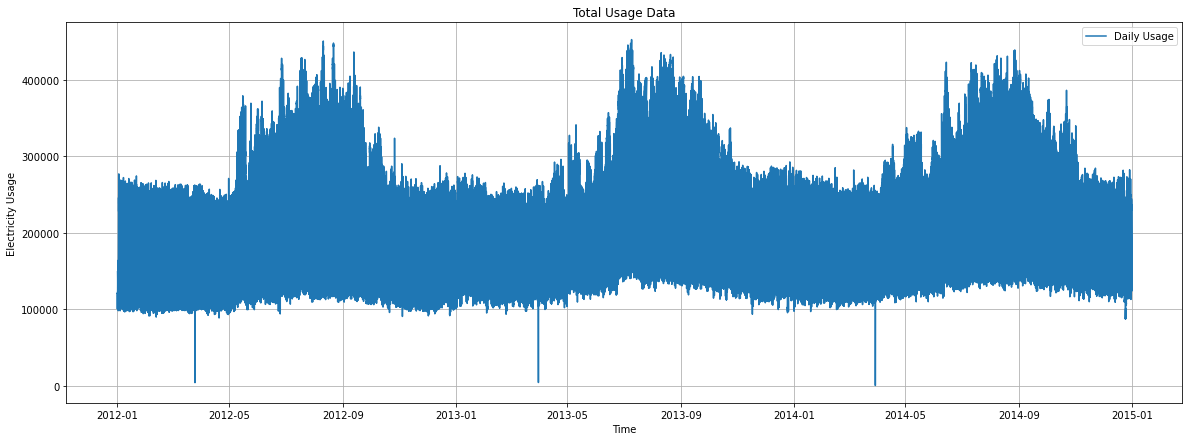

<Figure size 1440x720 with 0 Axes>

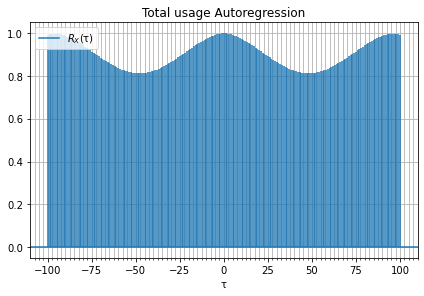

<Figure size 1440x720 with 0 Axes>

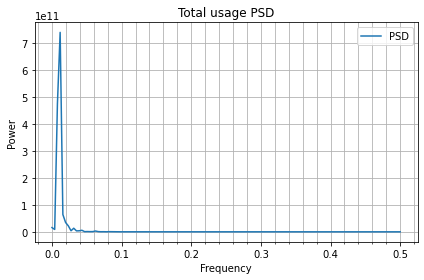

In [149]:
# Autocorrelation 
plt.figure(figsize=(20, 7))
plt.plot(data.time,data.total_usage)
plt.ylabel('Electricity Usage')
plt.xlabel('Time')
plt.title('Total Usage Data')
plt.legend(['Daily Usage'])
plt.grid(True)
t_date = data.time
x = data.total_usage.values

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.acorr(x,maxlags = 100)
minor_locator = AutoMinorLocator(10)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['$R_X$(\u03C4)'],loc='upper left')
plt.xlabel('\u03C4')
ax.grid(True, which='both')
plt.tight_layout()
plt.title('Total usage Autoregression')
fig.show()

#PSD
freqs, psd = signal.welch(x)
plt.figure(figsize=(20, 10))
fig, ax = plt.subplots()
ax.plot(freqs, psd)
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor')
plt.legend(['PSD'])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Total usage PSD')
ax.grid(True, which='both')
plt.tight_layout()
fig.show()


### Regression

In [150]:
model = sm.OLS(y_train, X_train)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            total_usage   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.366e+05
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:30:37   Log-Likelihood:            -7.9406e+05
No. Observations:               76000   AIC:                         1.588e+06
Df Residuals:                   75969   BIC:                         1.588e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.379e+05    8.8e+04     -1.567      0.1

In [151]:
X_test_rolling = X_test.copy().reset_index().drop('index', axis = 1)
rolling_predictions  = []
for i in range(29216):
    rolling_prediction = result.predict(X_test_rolling.iloc[i])
    rolling_predictions.append(rolling_prediction)
    for j in range(20):
        try:
            X_test_rolling.at[i+j, f'lagged_{j+1}'] = rolling_prediction
        except:
            'out_of_bound'

y_hat = pd.Series(rolling_predictions)
rmse(y_hat, y_test)

8490.569488496829

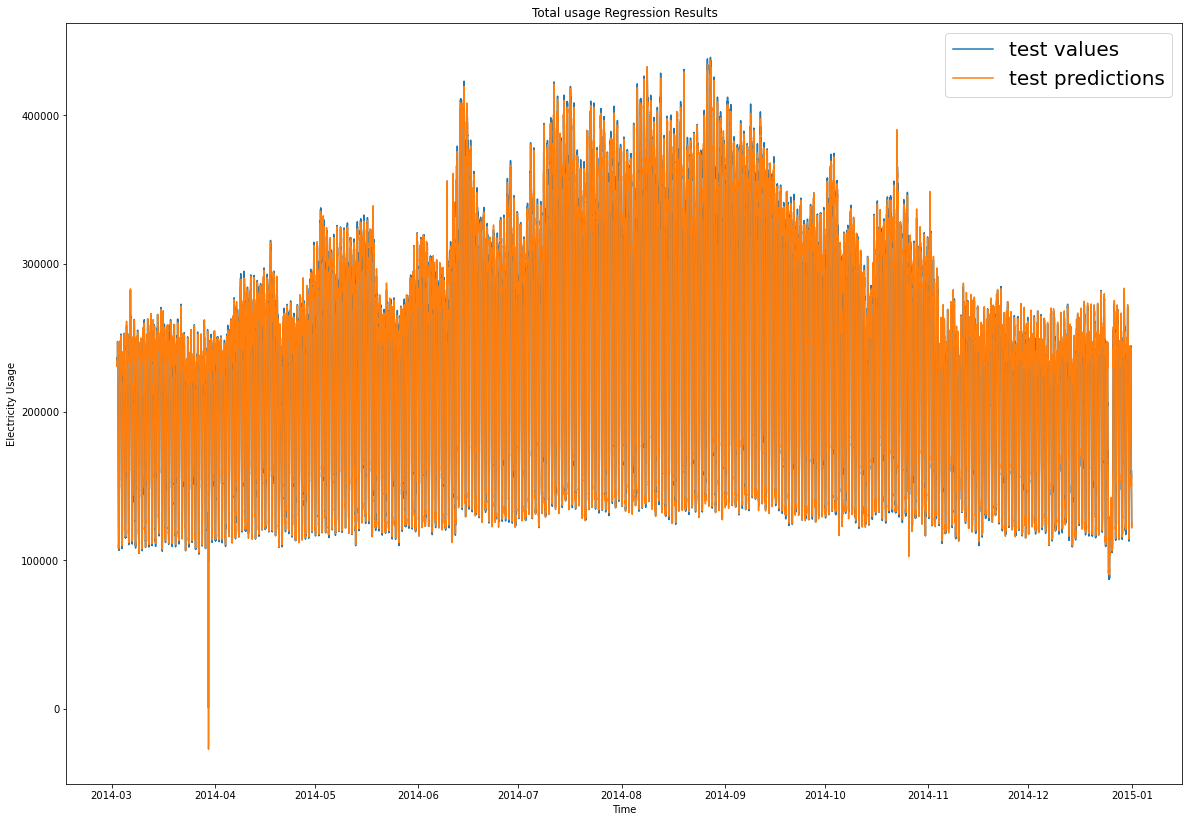

In [155]:
y_train_preds = result.predict(X_train)


plt.figure(figsize=(20, 14))
# plt.plot(train.time, y_train, label='train values')
plt.plot(test.time, y_test, label='test values')
# plt.plot(train.time, y_train_preds, label='train predictions')
plt.plot(test.time, y_hat, label='test predictions')

plt.xlabel('Time')
plt.ylabel('Electricity Usage')
plt.title('Total usage Regression Results')
plt.legend(fontsize = 20)
plt.show()

### Auto SARIMA

In [110]:
model = pm.auto_arima(train.total_usage, 
                      start_p=1,
                      start_q=1,
                      test='adf',
                      max_p=10,
                      max_q=10,
                      d=None, 
                      seasonal=True, 
                      seasonal_test='ocsb',
                      start_P=0, 
                      D=1, 
                      trace=True,
                      suppress_warnings=True, 
                      stepwise=True)


print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1605559.660, Time=3.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1933783.212, Time=0.79 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1879190.673, Time=4.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2092519.469, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1592413.939, Time=37.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1604755.822, Time=2.88 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1592075.078, Time=67.46 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1602903.373, Time=3.46 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1591498.827, Time=27.67 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1596139.988, Time=4.71 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1591085.579, Time=32.51 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1592232.265, Time=7.05 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=1590949.665, Time=49.5

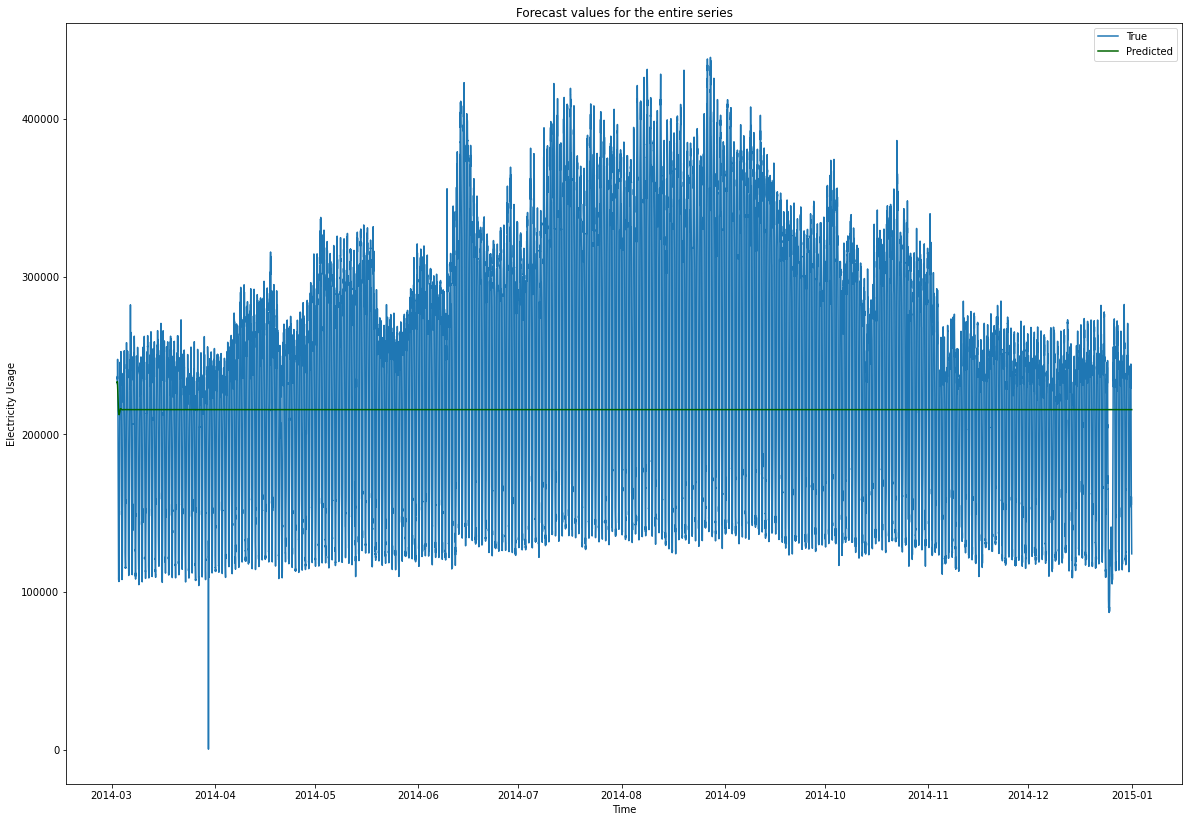

In [111]:
yhat = model.predict(n_periods=len(y_test), return_conf_int=False)
plt.figure(figsize=(20, 14))
plt.plot(test.time, y_test, label = 'True')
plt.plot(test.time, yhat, color='darkgreen', label = 'Predicted')
plt.title('Forecast values for the entire series')
plt.xlabel('Time')
plt.ylabel('Electricity Usage')
plt.legend()
plt.show()

In [112]:
rmse(y_test, yhat)

84733.54473002643

### Prophet

In [113]:
train['ds'] = train.time
train['y'] = train.total_usage

test['ds'] = test.time
test['y'] = test.total_usage

train = train.rename(columns = {0: "Sun", 1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})
test = test.rename(columns = {0: "Sun", 1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})

m = Prophet()
m.add_regressor('month')
m.add_regressor('day')
m.add_regressor('weekday')
m.add_regressor('Sun')
m.add_regressor('Mon')
m.add_regressor('Tues')
m.add_regressor('Wed')
m.add_regressor('Thurs')
m.add_regressor('Fri')
m.add_regressor('Sat')
m.fit(train)

C:\Users\mylov\AppData\Local\Temp/ipykernel_25836/1063848891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ds'] = train.time
C:\Users\mylov\AppData\Local\Temp/ipykernel_25836/1063848891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = train.total_usage
C:\Users\mylov\AppData\Local\Temp/ipykernel_25836/1063848891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [114]:
future = test[['ds', 'month', 'day', 'weekday', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']]
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Fri,Fri_lower,Fri_upper,Mon,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-03-02 16:15:00,198863.834115,218096.600792,287139.923926,198863.834115,198863.834115,0.0,0.0,0.0,0.0,...,-3311.720573,-3311.720573,-3311.720573,-15909.791348,-15909.791348,-15909.791348,0.0,0.0,0.0,252926.601245
1,2014-03-02 16:30:00,198862.407723,221278.533342,287157.083577,198862.407723,198862.407723,0.0,0.0,0.0,0.0,...,-3406.982137,-3406.982137,-3406.982137,-15909.551011,-15909.551011,-15909.551011,0.0,0.0,0.0,253570.436761
2,2014-03-02 16:45:00,198860.981331,223043.816894,285146.342766,198860.981331,198860.981331,0.0,0.0,0.0,0.0,...,-3500.106372,-3500.106372,-3500.106372,-15909.312691,-15909.312691,-15909.312691,0.0,0.0,0.0,254098.110044
3,2014-03-02 17:00:00,198859.554940,221004.385664,288961.933476,198859.554940,198859.554940,0.0,0.0,0.0,0.0,...,-3591.056922,-3591.056922,-3591.056922,-15909.076387,-15909.076387,-15909.076387,0.0,0.0,0.0,254504.675562
4,2014-03-02 17:15:00,198858.128548,218604.942732,290121.036283,198858.128548,198858.128548,0.0,0.0,0.0,0.0,...,-3679.798803,-3679.798803,-3679.798803,-15908.842095,-15908.842095,-15908.842095,0.0,0.0,0.0,254796.785575


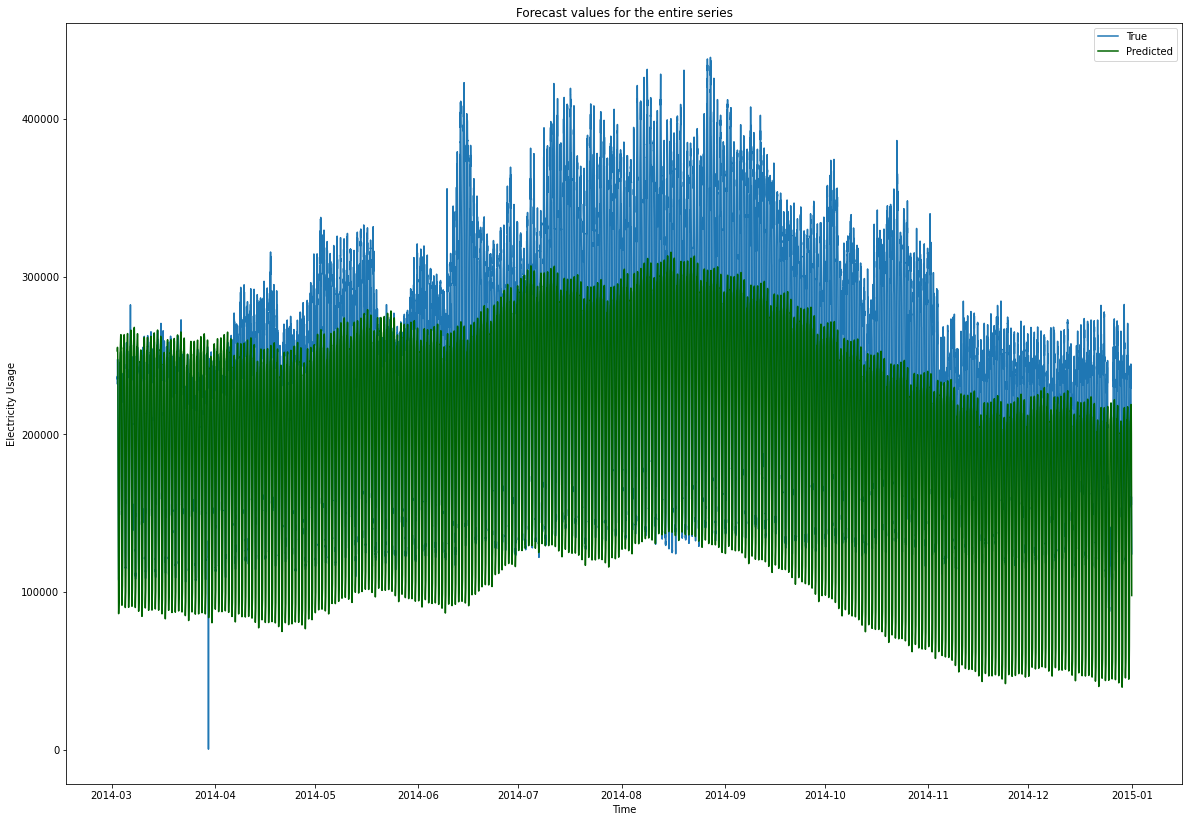

In [116]:
plt.figure(figsize=(20, 14))
plt.plot(test.time, y_test, label = 'True')
plt.plot(test.time, forecast.yhat, color='darkgreen', label = 'Predicted')
plt.title('Forecast values for the entire series')
plt.xlabel('Time')
plt.ylabel('Electricity Usage')
plt.legend()
plt.show()

In [115]:
rmse(y_test, forecast.yhat)

48774.79568286969